In [1]:
from pathlib import Path
import geopandas as gpd
import os
import matplotlib.pyplot as plt

from parameters import *

In [73]:
def create_cocs_tract_crosswalk(state = 'MA', year = 2024):
    
    directory = Path.cwd()
    coc_path = directory / 'data' / 'coc-shapefiles' / str(year) / f'CoC_GIS_State_Shapefile_{state}' / str.replace(state_info[state][0], " ", "_")
    if year == 2010:
        tract_file = f'tl_2010_{state_info[state][1]}_tract10.shp'
    else:
        tract_file = f'tl_{year}_{state_info[state][1]}_tract.shp'
    tracts_path = directory / 'data' / 'tract-shapefiles' / str(year) / f'Tract_GIS_ShapeFile_{state}' / tract_file
    cocs = [coc for coc in os.listdir(coc_path) if coc.startswith(state + '_')]

    # We must represent each CoC as a combination of Census tracts
    cocs_tract_crosswalk = {}
    tracts = gpd.read_file(tracts_path)
    
    for coc in cocs:
        print(coc)
        coc_tract_crosswalk = {}
        coc_file = coc_path / coc / str(coc + '.shp')
        if coc_file.is_file():
            coc_gpd = gpd.read_file(coc_file)
            overlapping_tracts = gpd.sjoin(tracts.to_crs(coc_gpd.crs), coc_gpd, how="inner", predicate="intersects")
            # FOR DEBUGGING: Plot the overlapping tracts
            # fig, axes = plt.subplots(ncols = 2)
            # coc_gpd.plot(
            #     ax=axes[0]
            # )
            # overlapping_tracts.plot(
            #     ax=axes[1]
            # )

            # fig, ax = plt.subplots(figsize=(12, 12))
            # coc_gpd.plot(ax=ax, color='none', edgecolor='black', linewidth=3)
            # # overlapping_tracts.plot(ax=ax, color='lightblue', edgecolor='darkblue', alpha=0.4)
            # ax.set_xticks([])
            # ax.set_yticks([])
            # ax.set_xlabel('')
            # ax.set_ylabel('')
            # plt.show()

            fig, ax = plt.subplots(figsize=(12, 12))
            plt.subplots(figsize=(12, 12))
            coc_gpd.plot(ax=ax, color='lightblue', edgecolor='black', linewidth=3)
            # overlapping_tracts.plot(ax=ax, color='lightblue', edgecolor='darkblue', alpha=0.4)
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_xlabel('')
            ax.set_ylabel('')
            plt.show()

            fig, ax = plt.subplots(figsize=(12, 12))
            coc_gpd.plot(ax=ax, color='lightblue', edgecolor='black', linewidth=3)
            overlapping_tracts.plot(ax=ax, color='lightblue', edgecolor='darkgray', alpha=0.4)
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_xlabel('')
            ax.set_ylabel('')
            plt.show()
            
            # For those tracts that overlap, we estimate how much of each tract is contained in the CoC
            # First, project the CoC and tracts into an area-preserving coordinate system
            coc_projected = coc_gpd.to_crs(epsg=6933)
            tracts_projected = overlapping_tracts.to_crs(epsg=6933)
            for tract in tracts_projected.itertuples():
                intersection_area = tract.geometry.intersection(coc_projected.geometry).area
                tract_area = tract.geometry.area
                overlap = (intersection_area.iat[0]/tract_area)
            
                # Only keep tracts for which at least 1% of the tract is in CoC
                if overlap > 0.01: coc_tract_crosswalk[tract.GEOID] = round(overlap, 4)
        
        cocs_tract_crosswalk[coc] = coc_tract_crosswalk
    
    return cocs_tract_crosswalk

MA_507


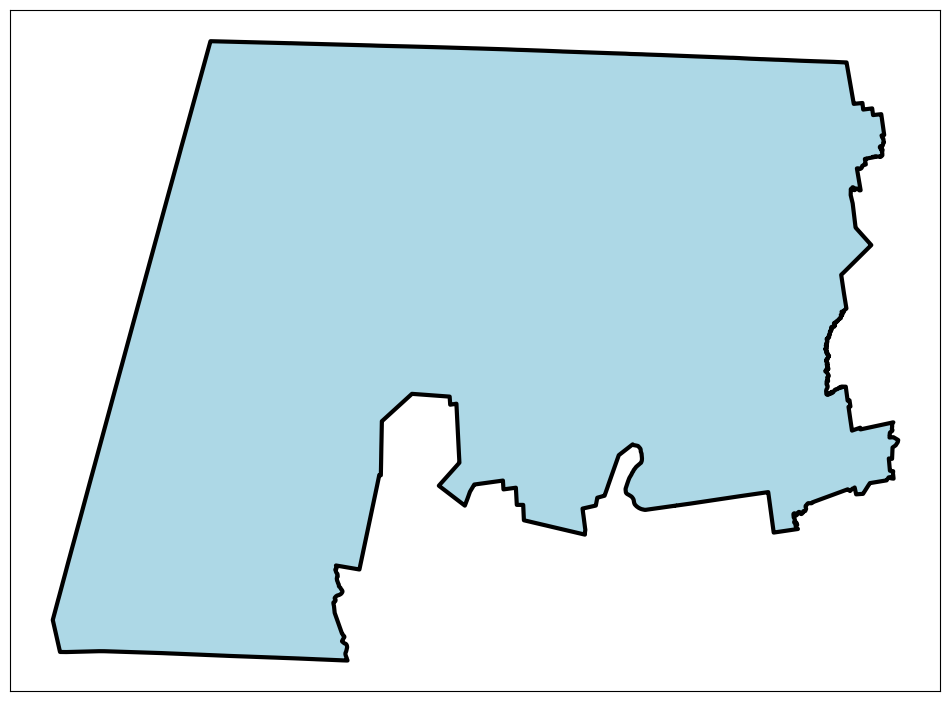

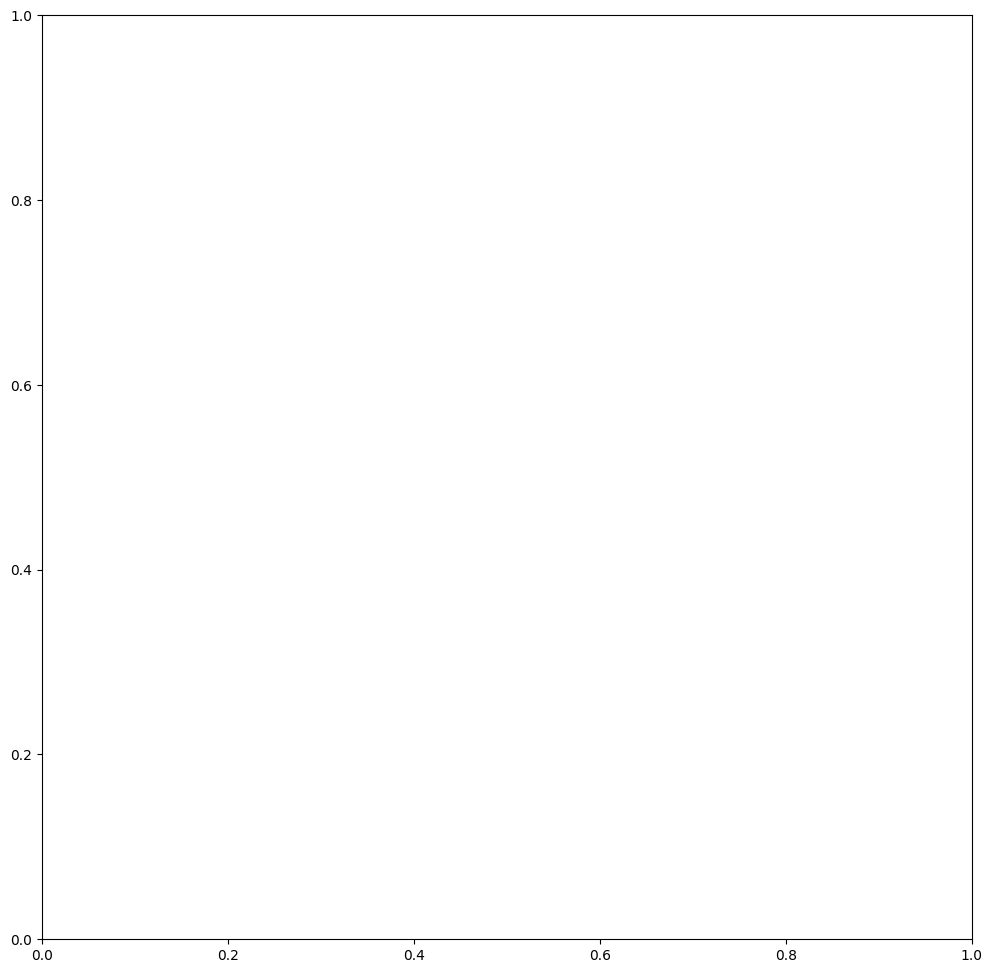

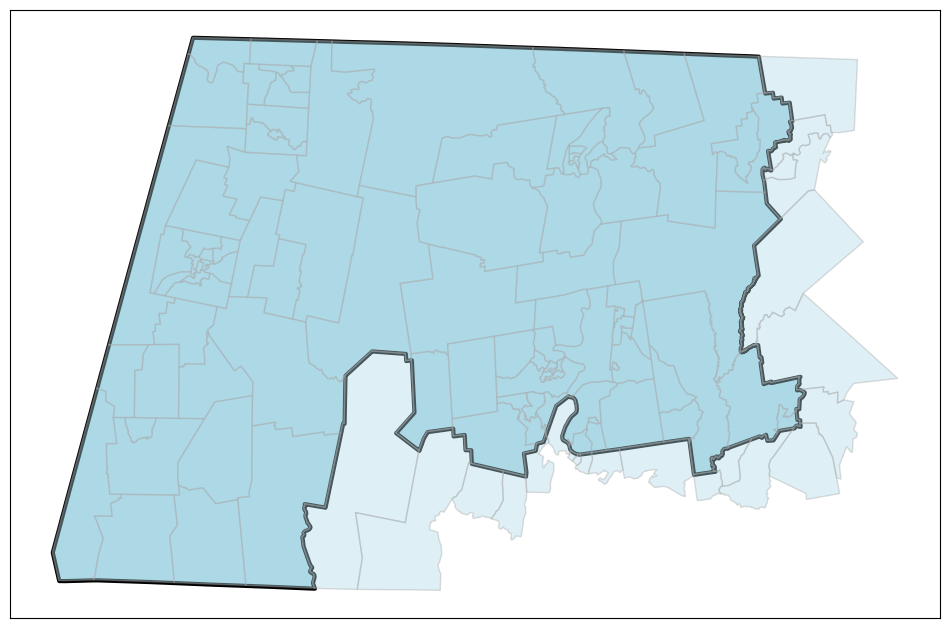

MA_500


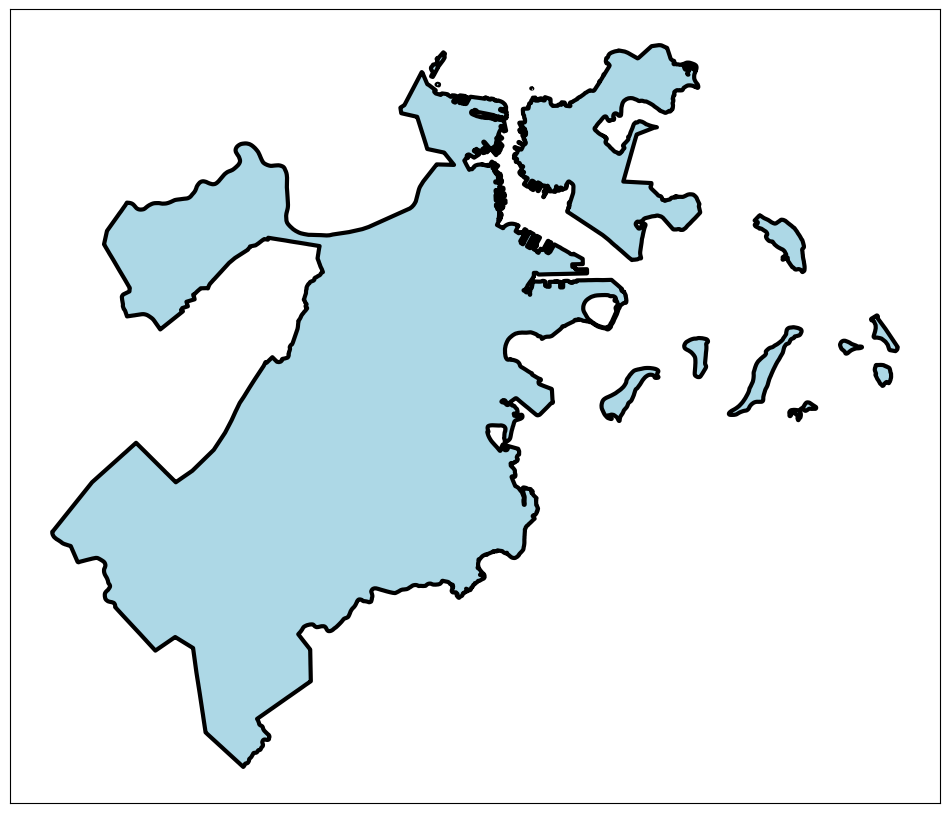

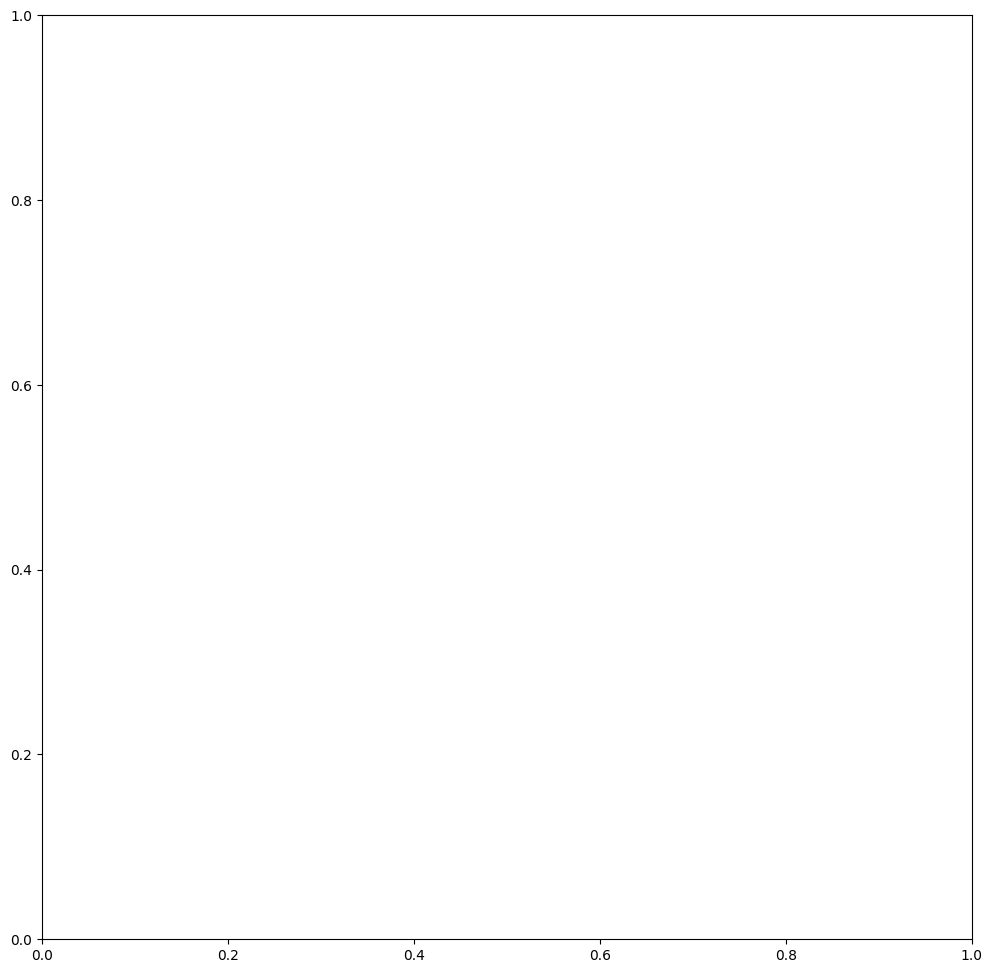

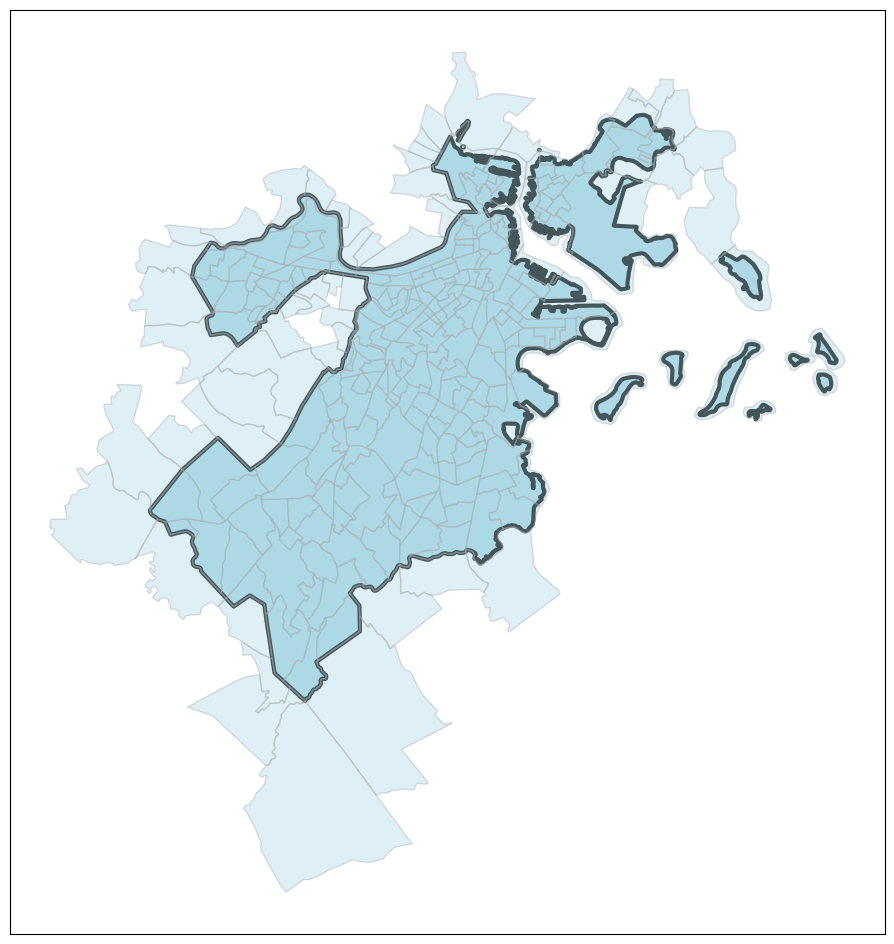

MA_509


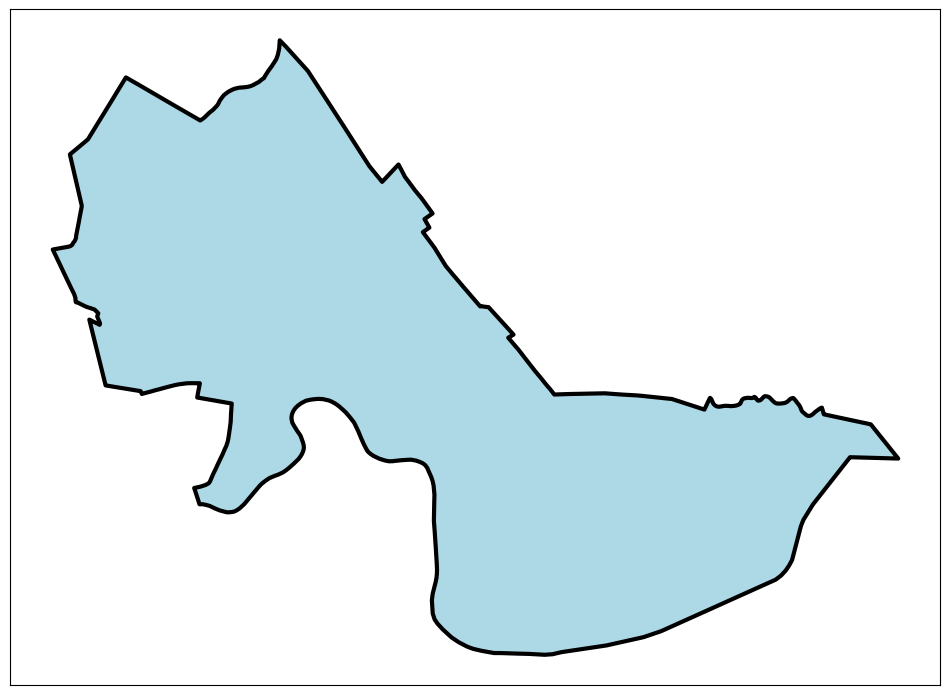

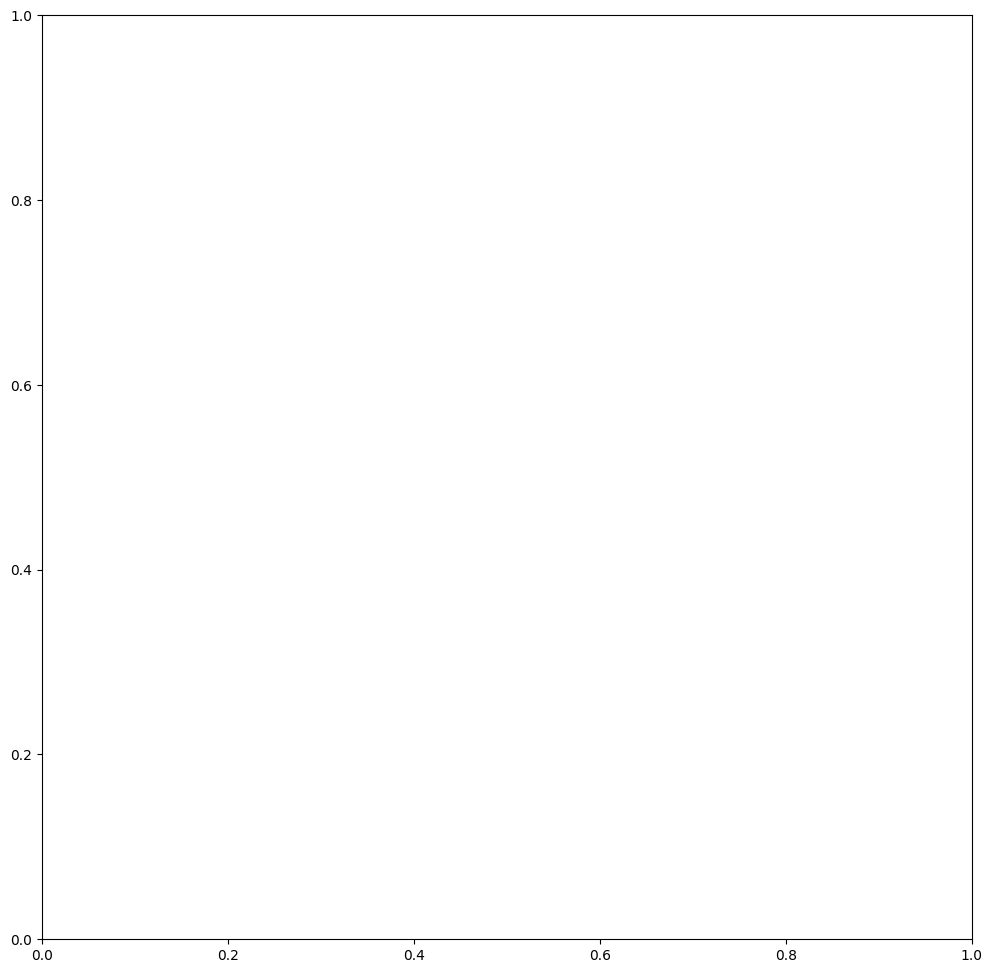

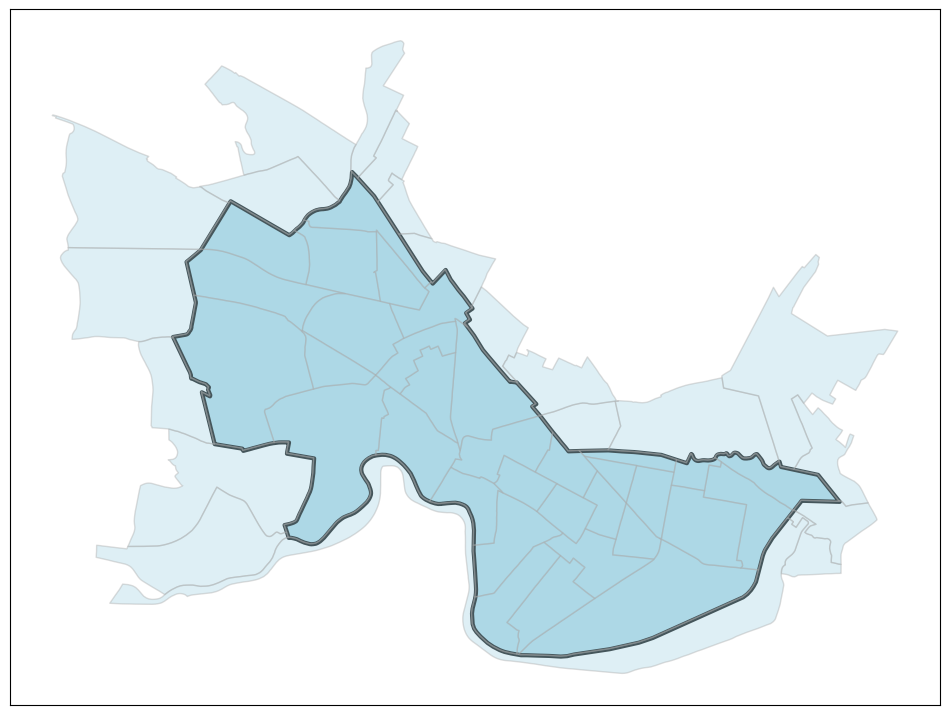

MA_506


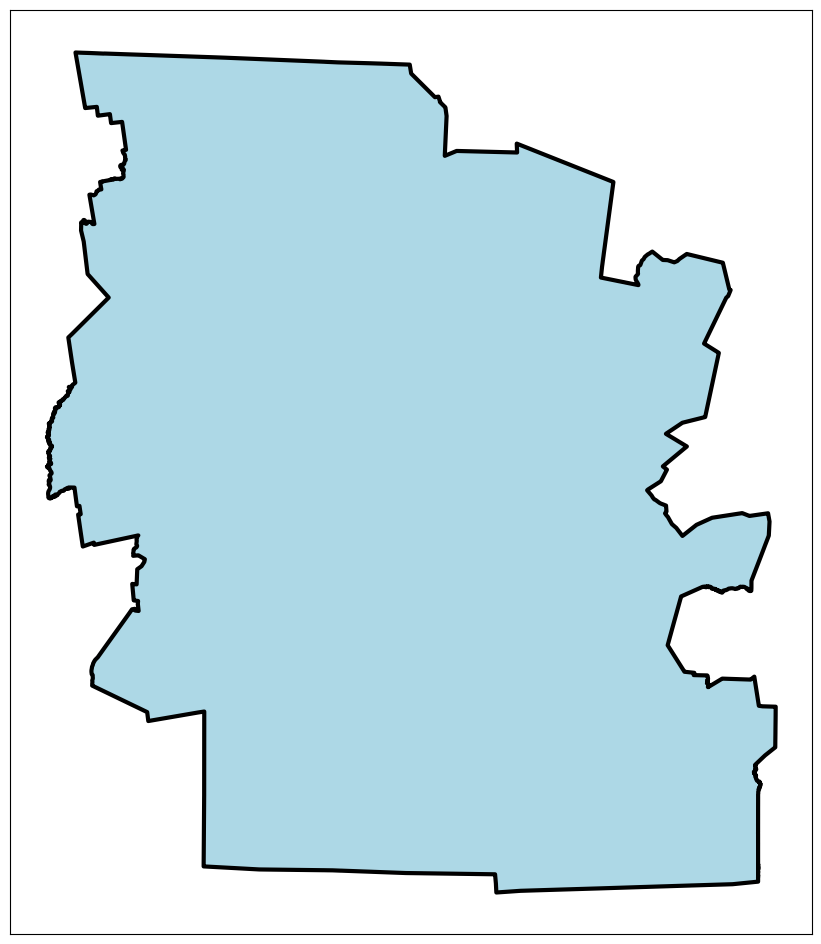

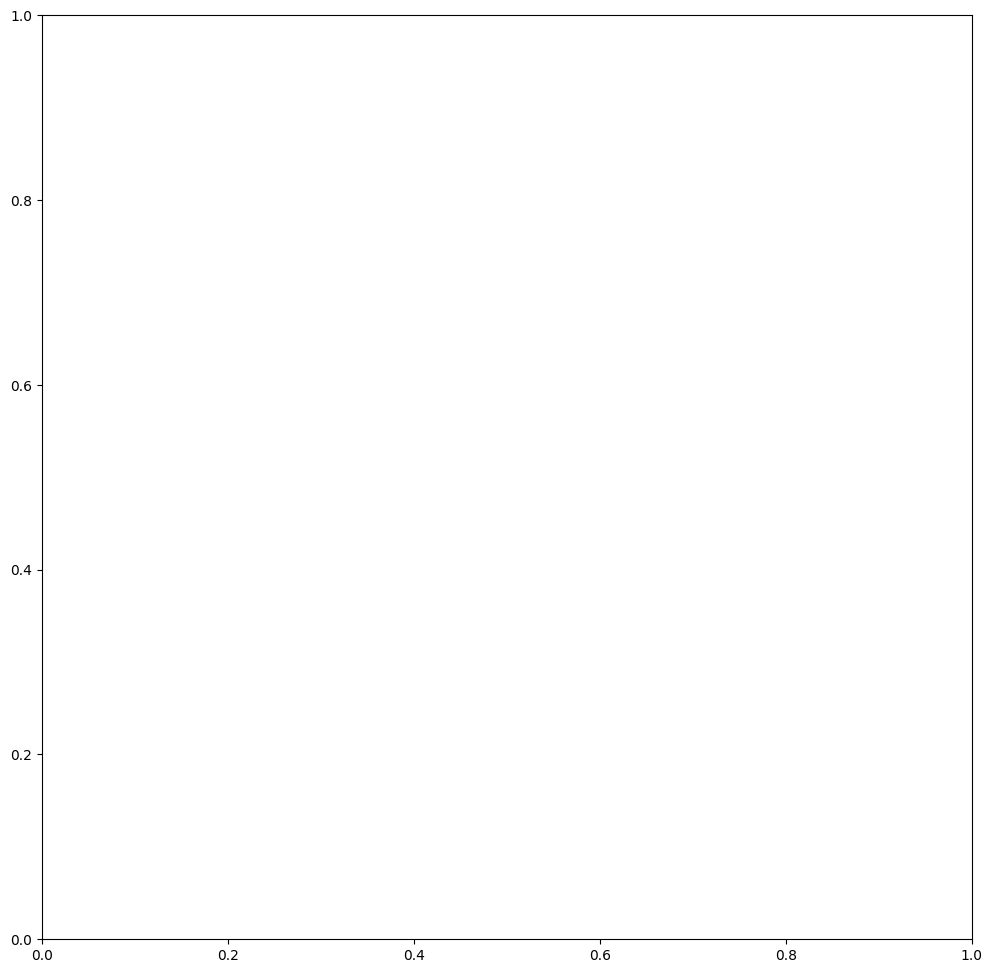

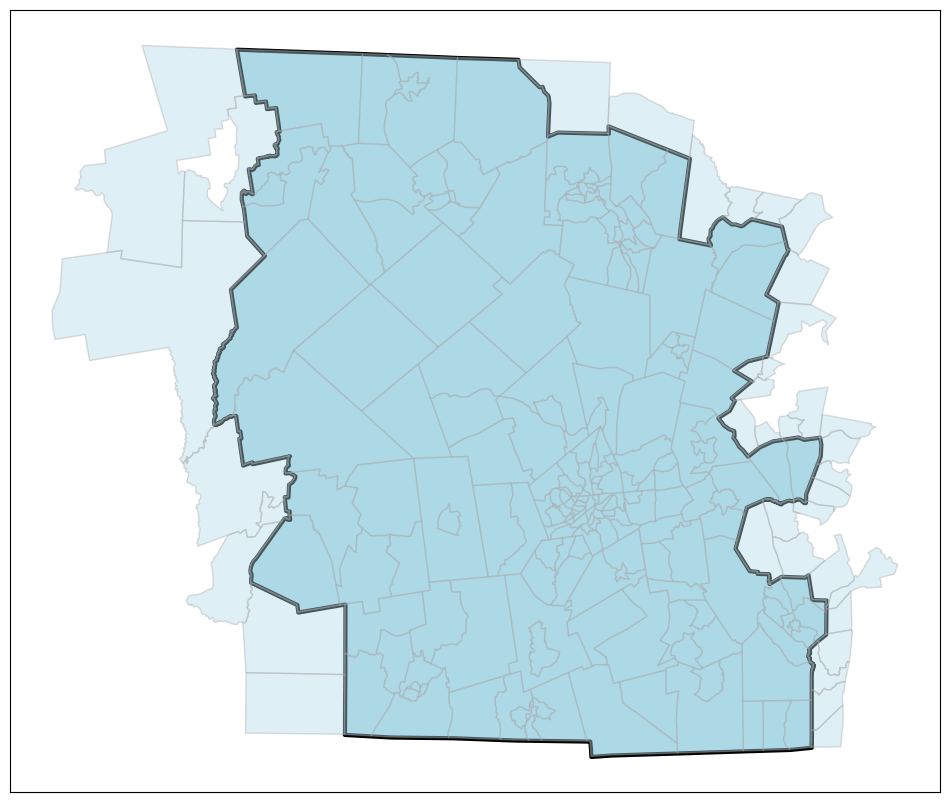

MA_515


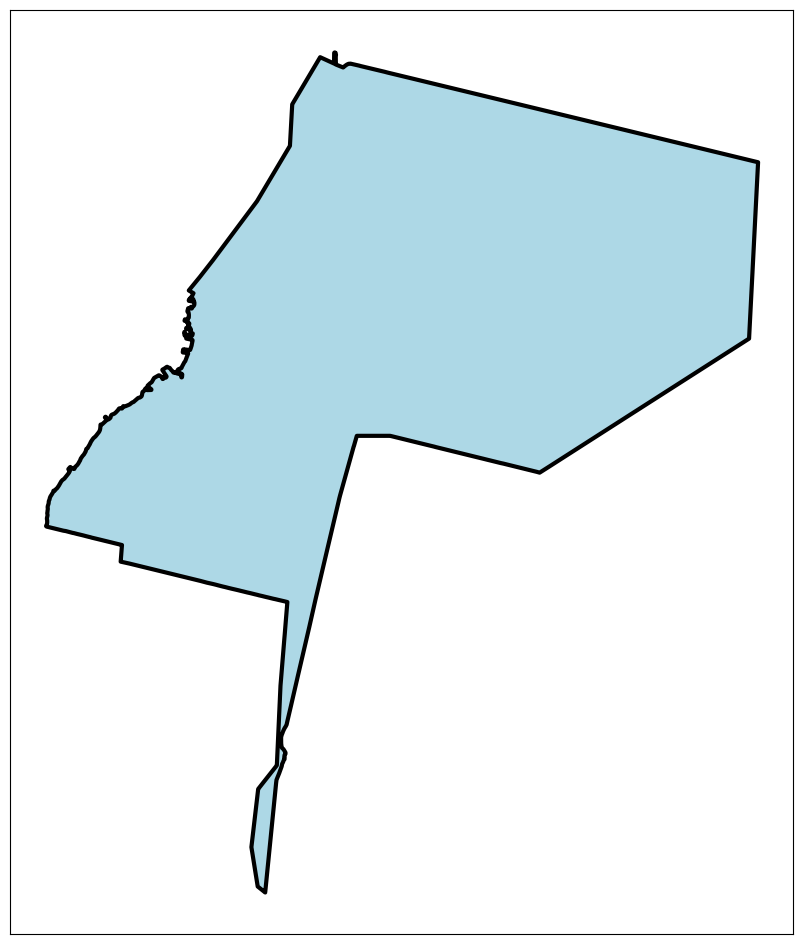

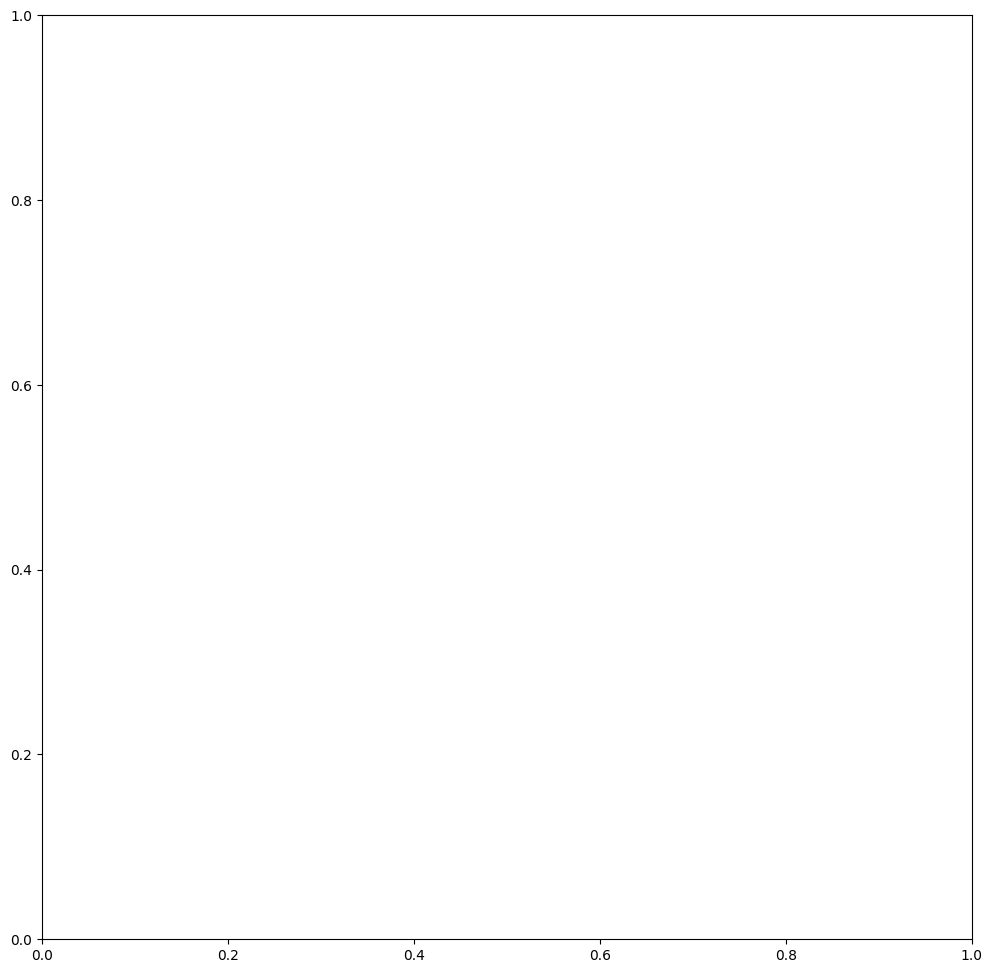

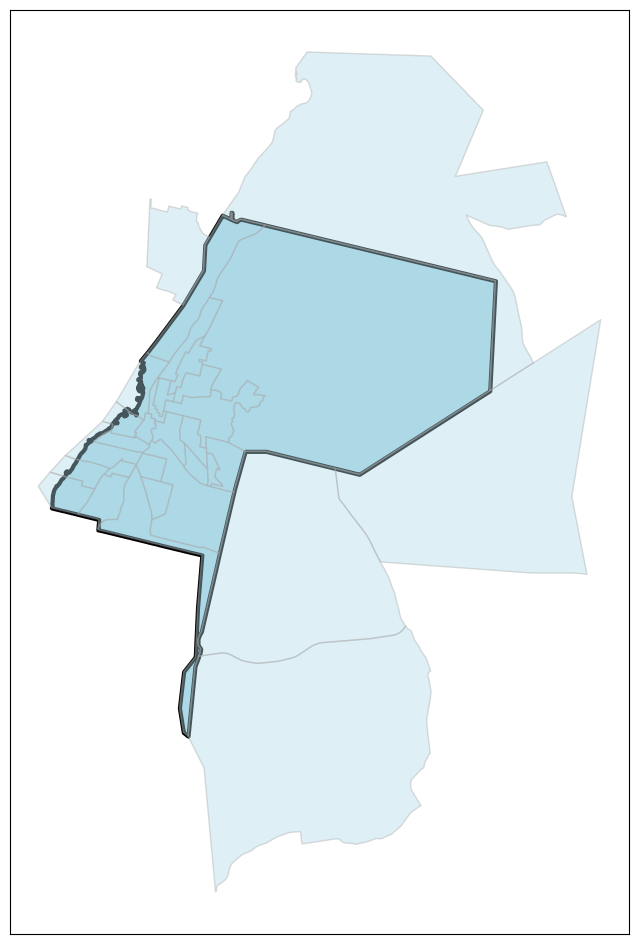

MA_503


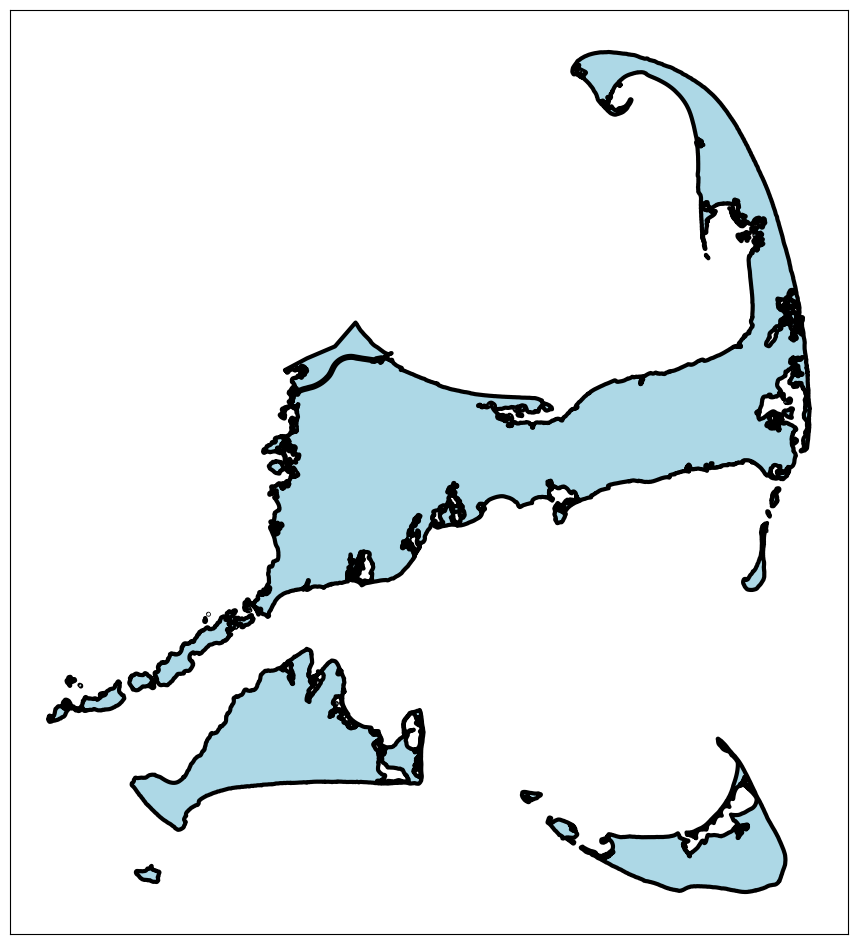

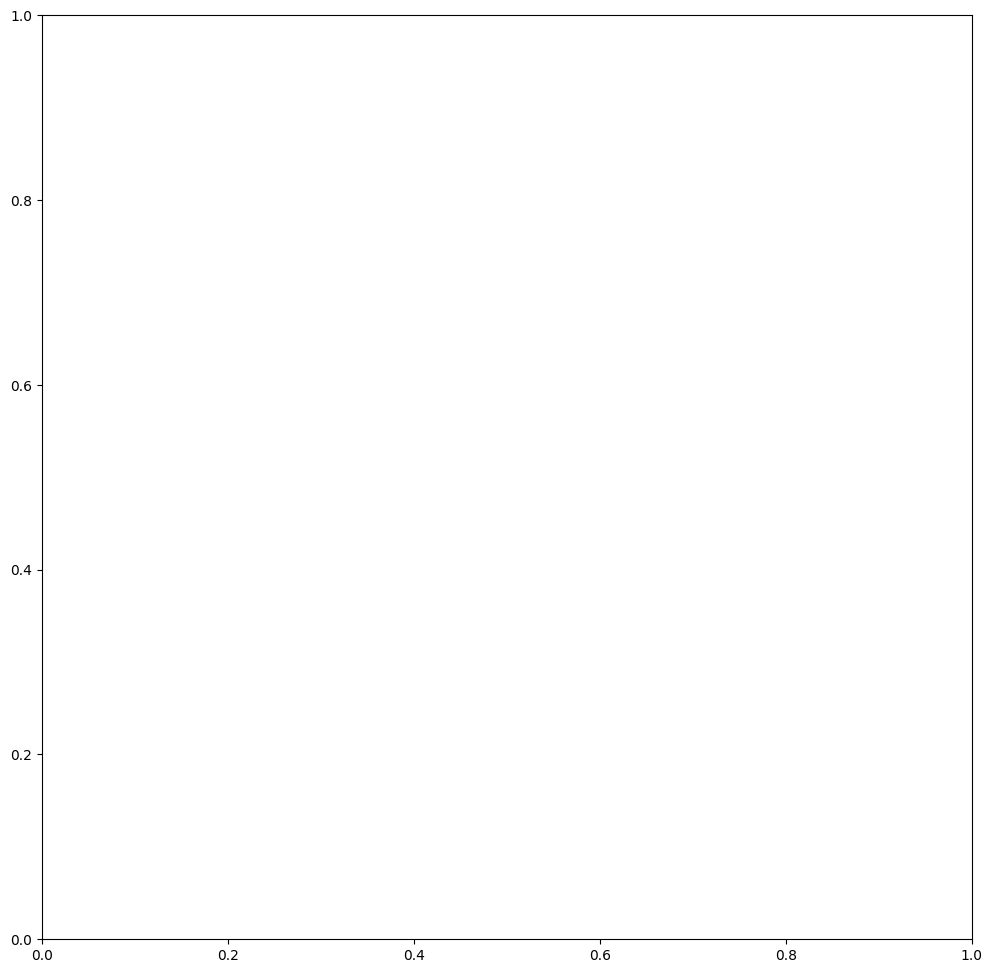

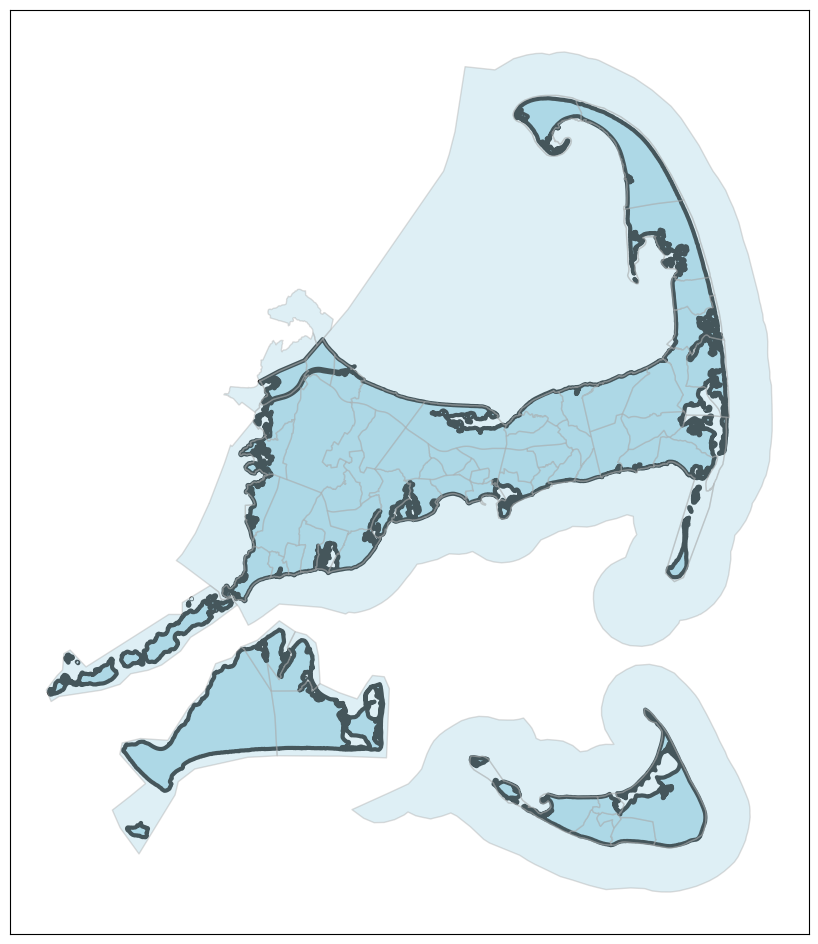

MA_504


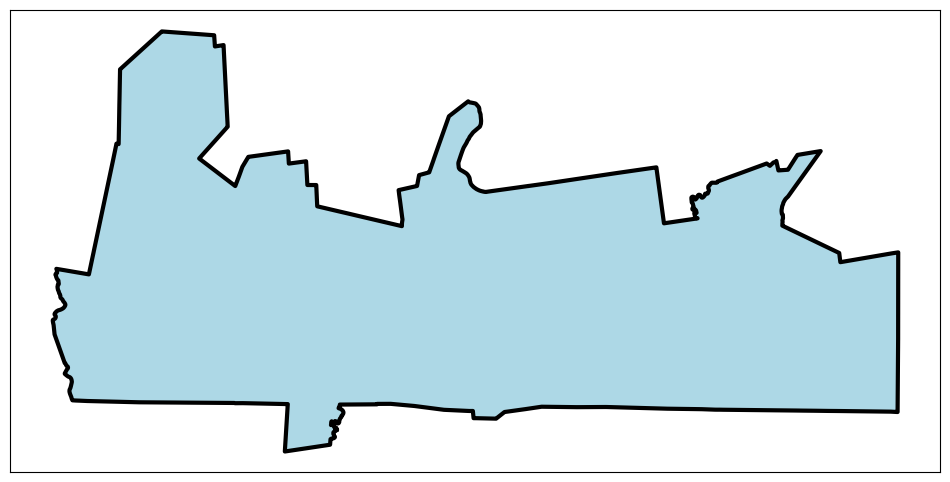

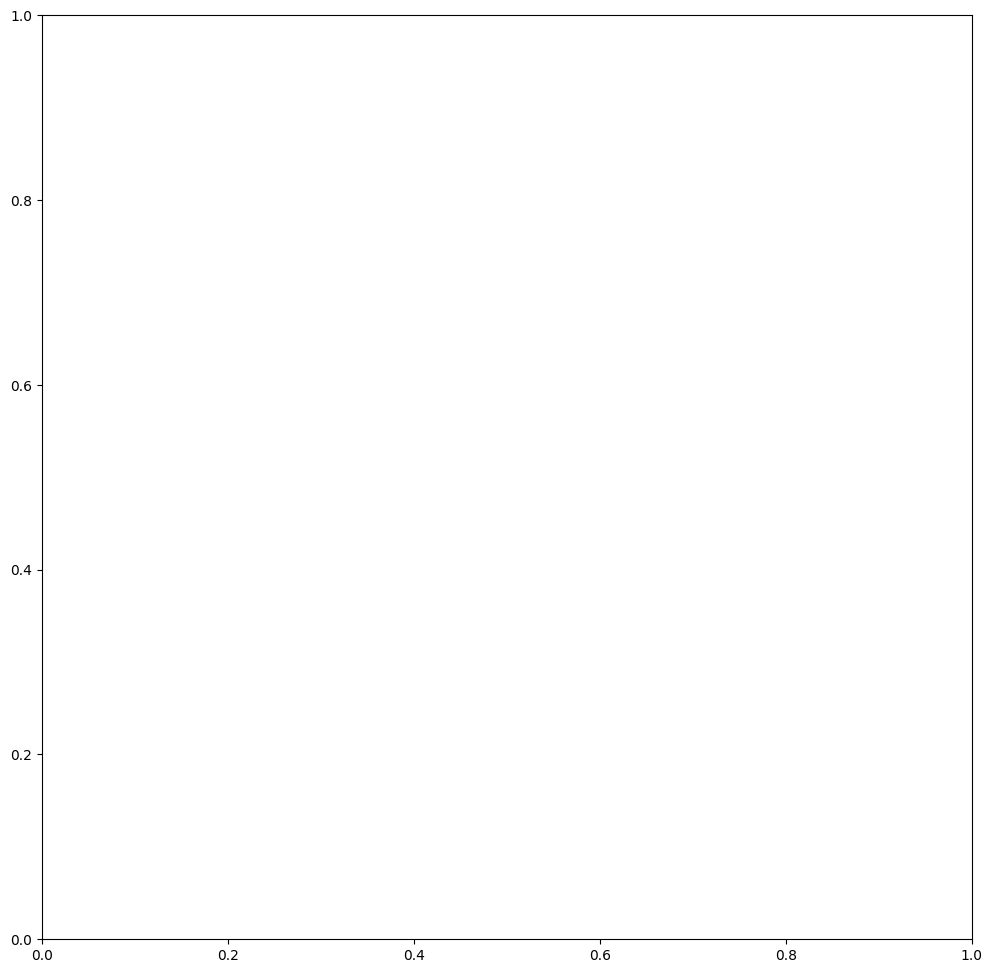

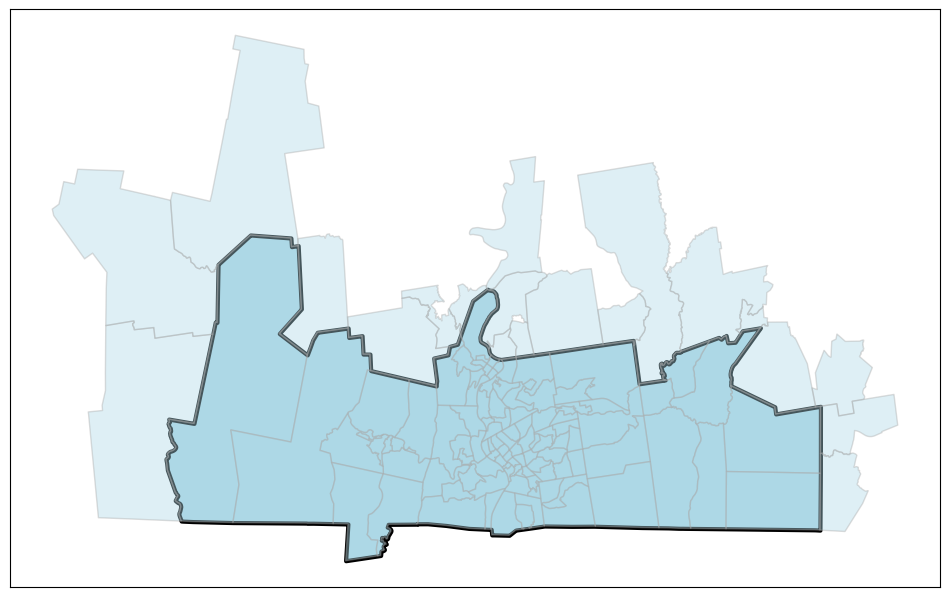

MA_505


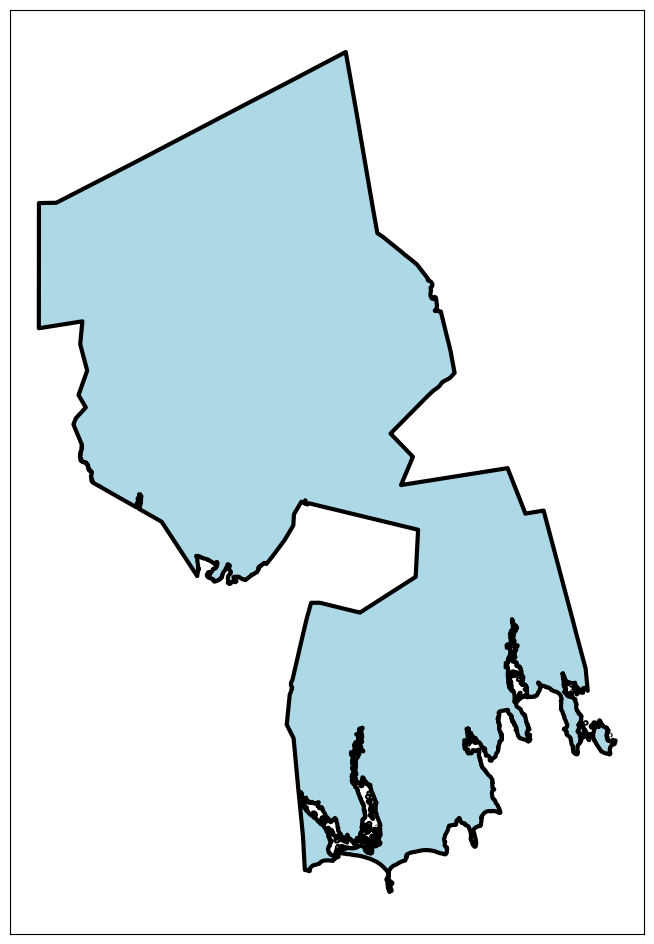

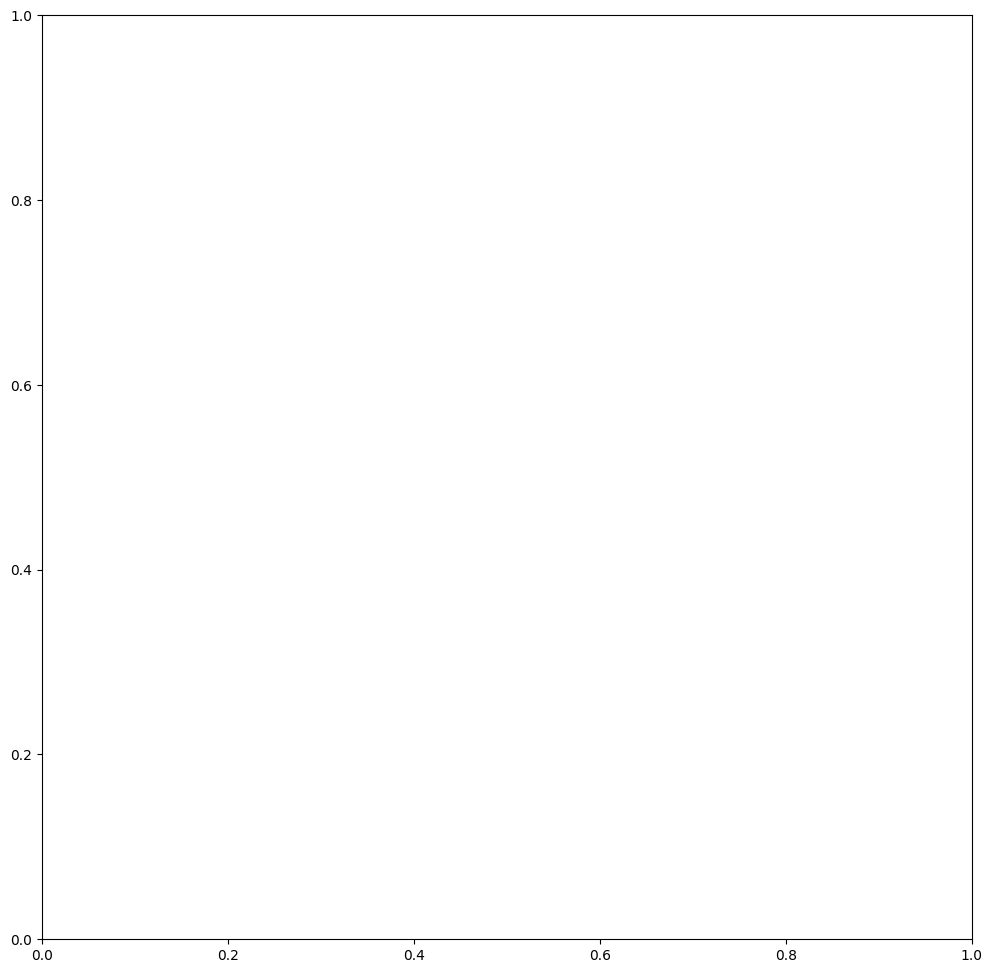

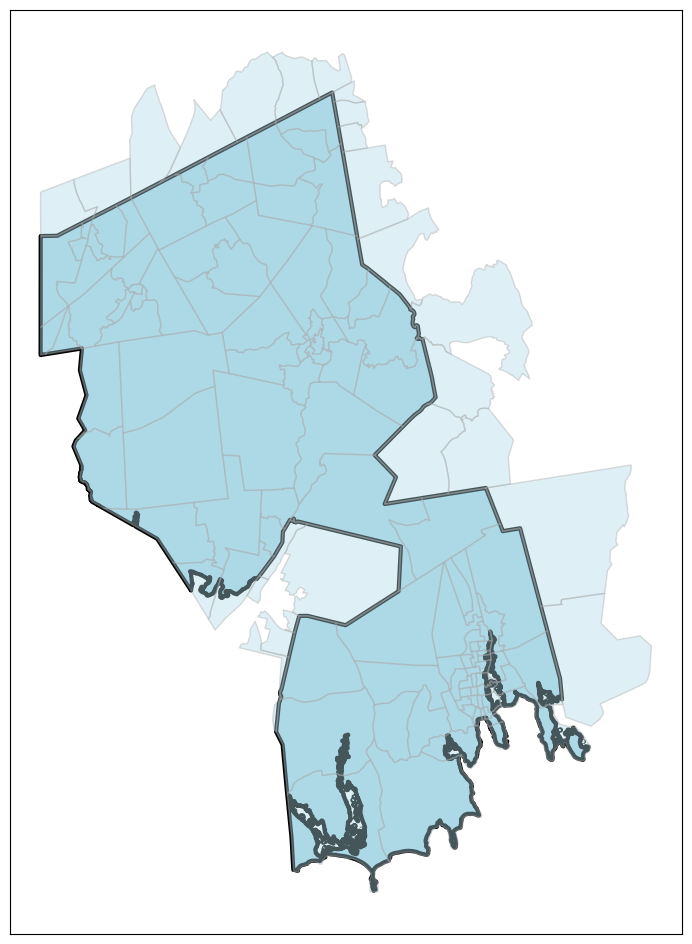

MA_502


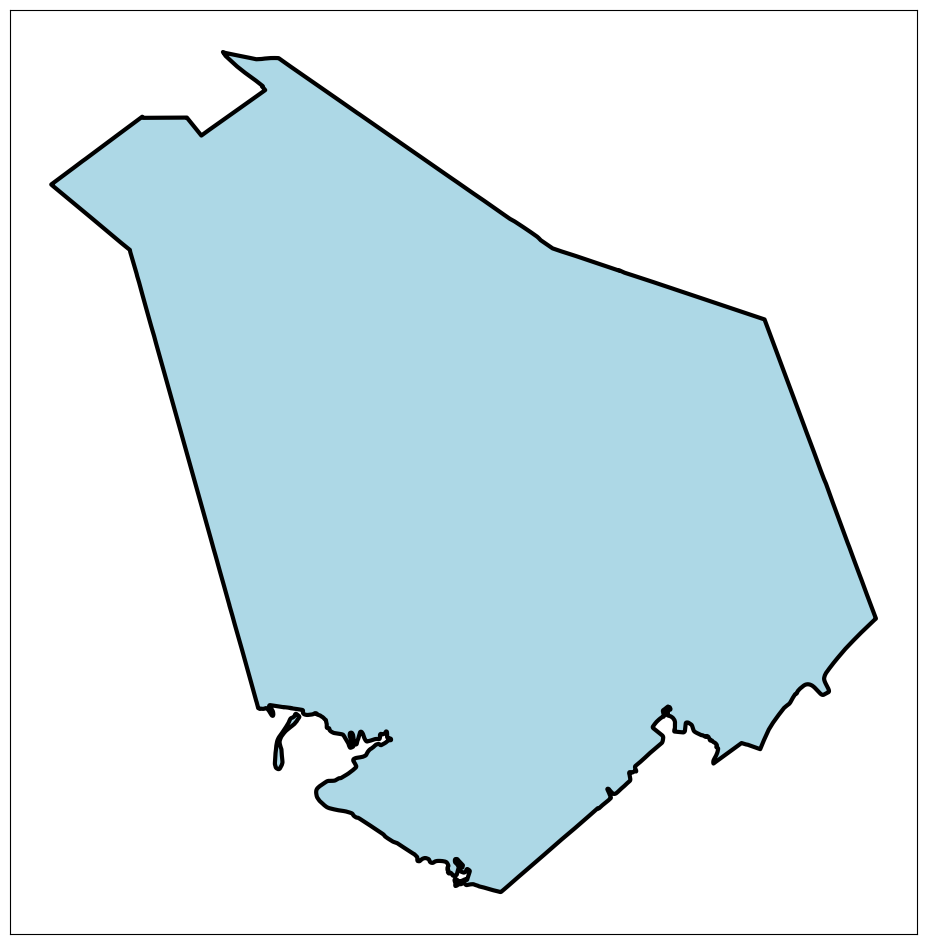

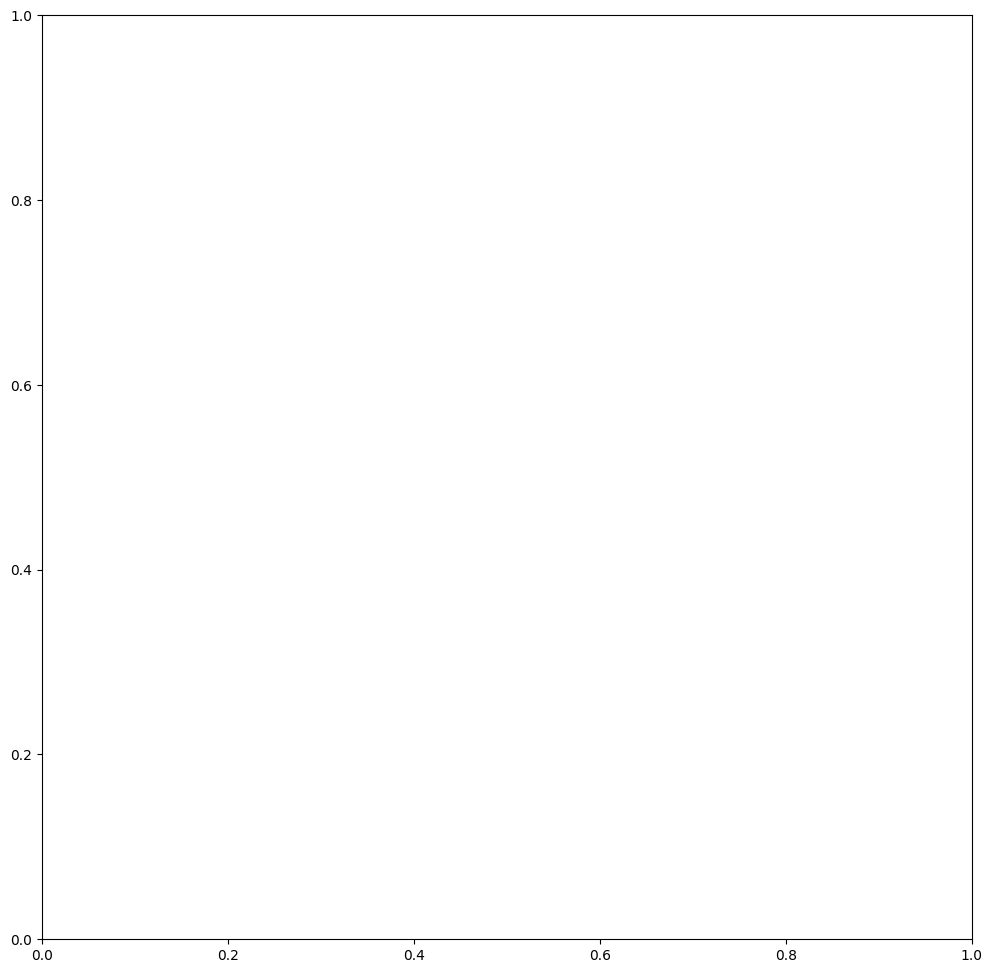

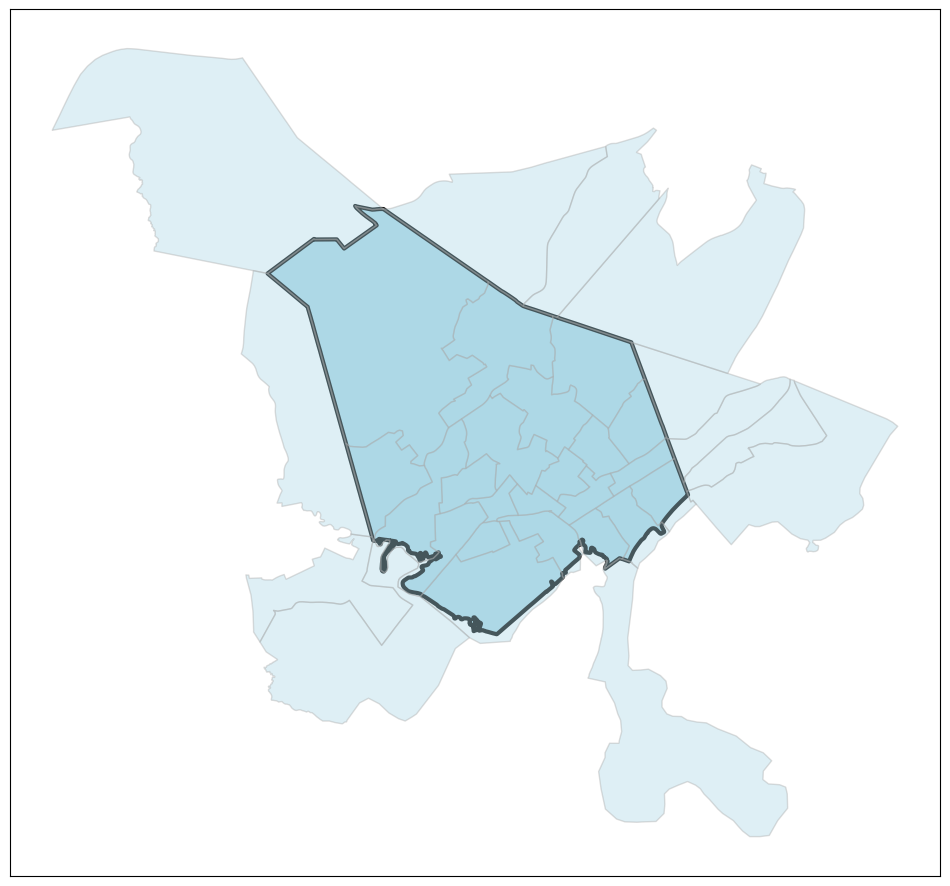

MA_511


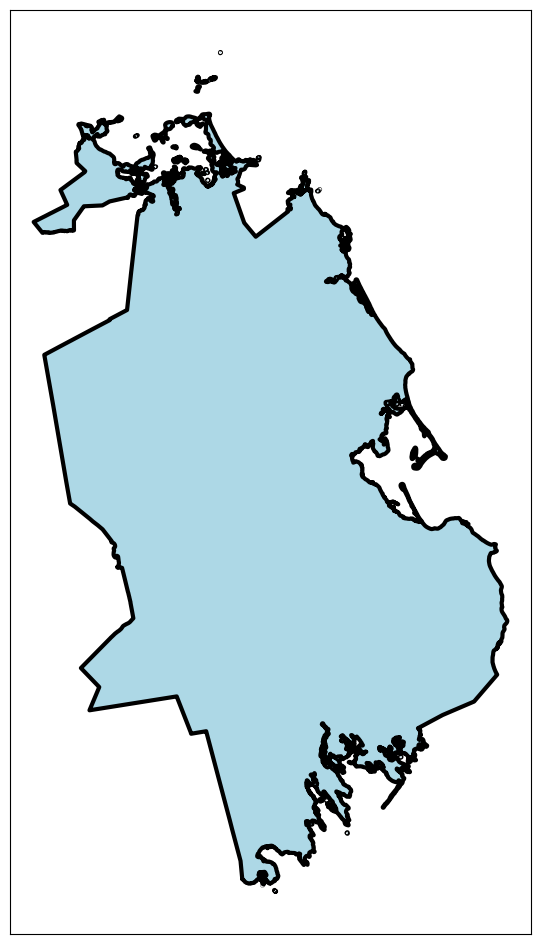

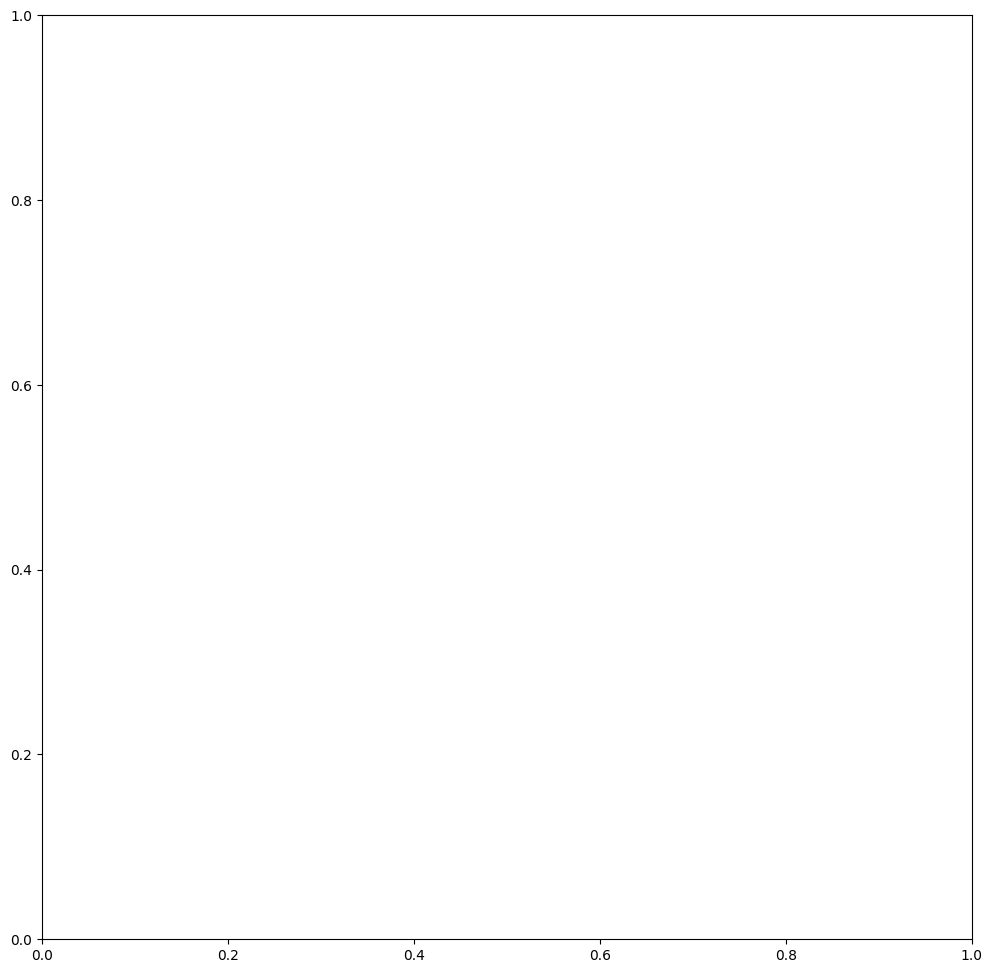

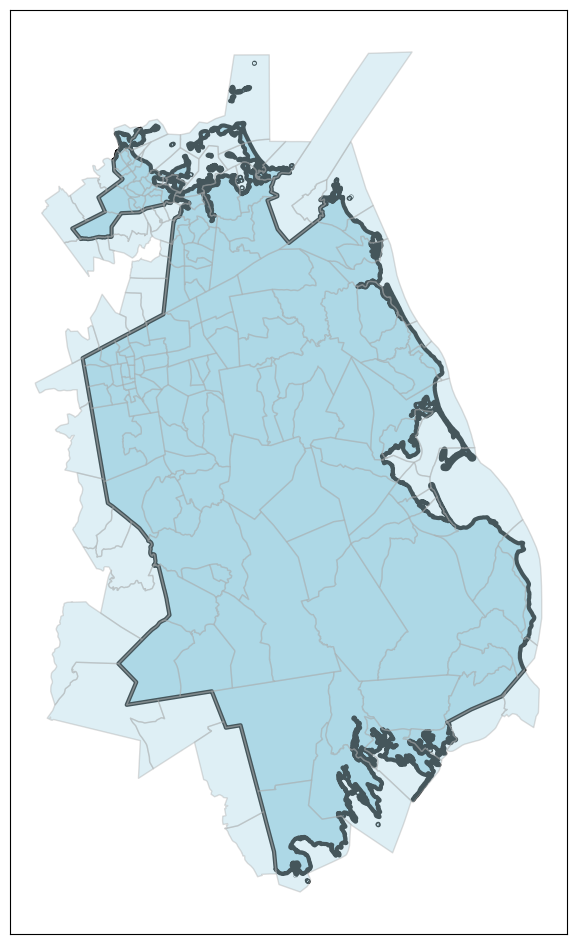

MA_516


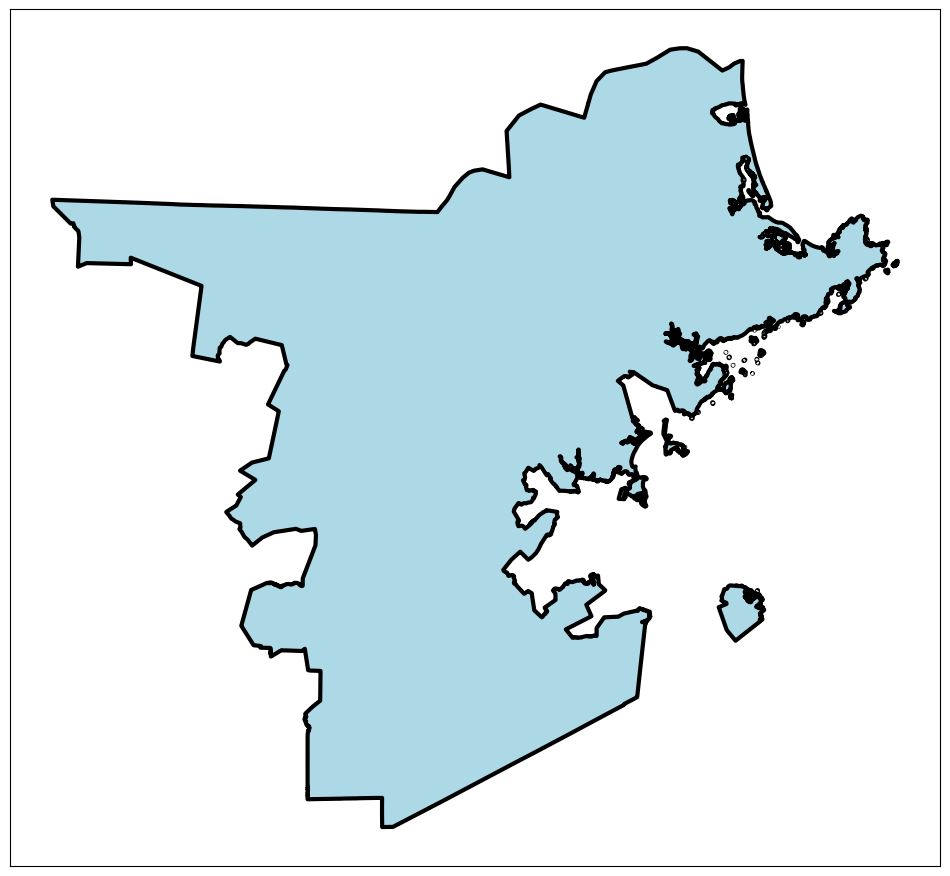

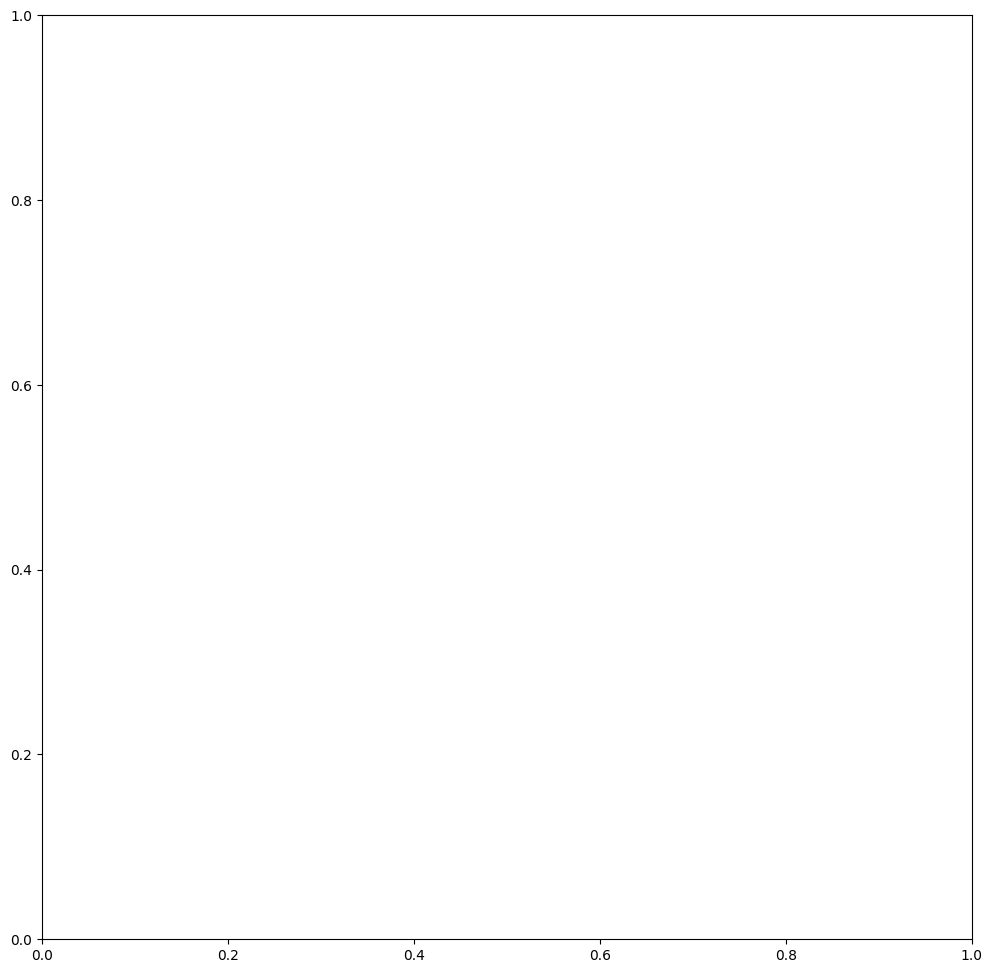

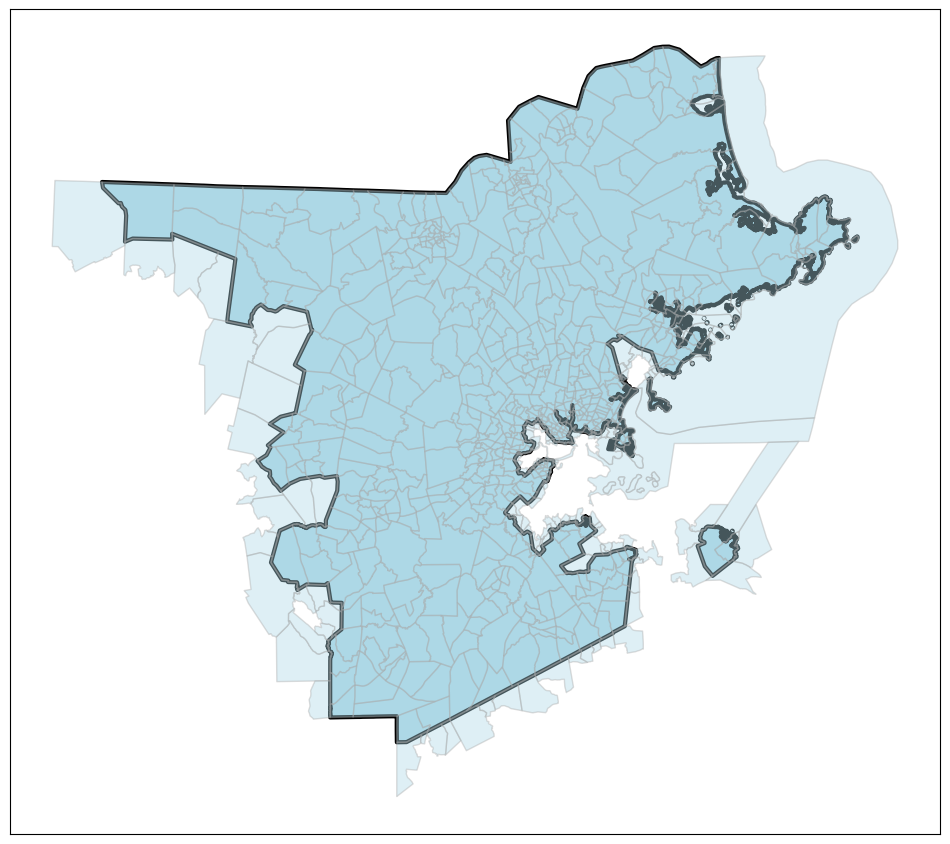

{'MA_507': {'25011041301': np.float64(1.0),
  '25011041302': np.float64(1.0),
  '25015820205': np.float64(1.0),
  '25015821101': np.float64(1.0),
  '25015822607': np.float64(1.0),
  '25015820206': np.float64(1.0),
  '25015820207': np.float64(1.0),
  '25011040800': np.float64(1.0),
  '25011041200': np.float64(1.0),
  '25003925101': np.float64(1.0),
  '25003925102': np.float64(1.0),
  '25003935200': np.float64(1.0),
  '25003921400': np.float64(1.0),
  '25003933300': np.float64(1.0),
  '25003934200': np.float64(1.0),
  '25003934300': np.float64(1.0),
  '25003900100': np.float64(1.0),
  '25003900200': np.float64(1.0),
  '25003900300': np.float64(1.0),
  '25003933400': np.float64(1.0),
  '25003922300': np.float64(1.0),
  '25003935300': np.float64(1.0),
  '25003900500': np.float64(1.0),
  '25003920101': np.float64(1.0),
  '25003900400': np.float64(1.0),
  '25003900900': np.float64(1.0),
  '25003920102': np.float64(1.0),
  '25003922200': np.float64(1.0),
  '25003913100': np.float64(1.0),
  '2

In [74]:
create_cocs_tract_crosswalk()